In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame with a semicolon separator
biovid_file_path = '/home/abidhasan/Documents/DA_Project/BioVid/results/5_loso_biovid.csv'  # Replace with the actual path to your CSV file
pain_file_path = '/home/abidhasan/Documents/DA_Project/BioVid/results/5_loso_painmonit.csv'
df_biovid = pd.read_csv(biovid_file_path, sep=';')
df_pain = pd.read_csv(pain_file_path, sep=';')

In [76]:
df_biovid.head(2)

,Start time,End time,Duration,Net,Aug_method,Aug_factor,Max_acc_mean,Avg_acc_mean,Std. acc mean,Avg. acc std,...,Max_F1_mean,Avg_F1_mean,Std. F1 mean,Avg. F1 std,Std. F1 std,All F1 mean,All F1 std,All Acc mean,All Acc std,Param
0,2023-10-18 09:28:18.119827,2023-10-18 10:38:51.166128,1:10:33,mlp,NaN,0,"83,88","83,51","0,23","13,26",...,"83,45","83,11","0,21","13,9","0,08","[0.8291133994194463, 0.829436464889622, 0.8326...","[0.1377855021449928, 0.13964868796283175, 0.13...","[0.8330459770114942, 0.8330459770114941, 0.836...","[0.13160668571617049, 0.13409414329278055, 0.1...","[('aug_factor', None), ('aug_method', None), (..."
1,2023-10-27 15:13:44.708503,2023-10-27 16:30:22.209325,1:16:37,mlp,RGW,"0,2","83,94","83,75","0,14","13,17",...,"83,53","83,34","0,15","13,87","0,07","[0.8319581080852871, 0.835303965106923, 0.8336...","[0.13934066224916866, 0.13767084042008892, 0.1...","[0.8364942528735633, 0.8393678160919539, 0.837...","[0.13167819302638792, 0.13079290596799348, 0.1...","[('aug_factor', 0.2), ('aug_method', 'RGW'), (..."


In [77]:
# iterating the columns
for col in df_biovid.columns:
    print(col)

Start time
End time
Duration
Net
Aug_method
Aug_factor
Max_acc_mean
Avg_acc_mean
Std. acc mean
Avg. acc std
Std. acc std
Max_F1_mean
Avg_F1_mean
Std. F1 mean
Avg. F1 std
Std. F1 std
All F1 mean
All F1 std
All Acc mean
All Acc std
Param


In [85]:
df_biovid.groupby(['Aug_factor','Aug_method'])['Max_acc_mean'].max()

Aug_factor  Aug_method
0,2         DGW           83,85
            RGW           83,94
            TW            84,35
            convolve      83,79
            crop          83,85
            drift         83,82
            jitter        84,25
            quantize      84,02
            rotation      82,59
0,4         DGW           83,62
            RGW           83,68
            TW            84,17
            convolve      83,65
            crop          83,65
            drift         83,97
            jitter        83,88
            quantize      84,05
            rotation      81,09
0,6         DGW           83,48
            RGW           83,51
            TW            84,11
            convolve      83,68
            crop          83,85
            drift         83,91
            jitter        83,74
            quantize      83,59
            rotation      80,89
0,8         DGW            83,3
            RGW           83,65
            TW            83,88
            convo

In [79]:
df_pain.groupby('Aug_method')['Max_F1_mean'].max()

Aug_method
DGW         87,79
RGW          88,0
TW           88,1
convolve    89,33
crop        87,55
drift       88,47
jitter      89,01
quantize     88,8
rotation    86,93
Name: Max_F1_mean, dtype: object

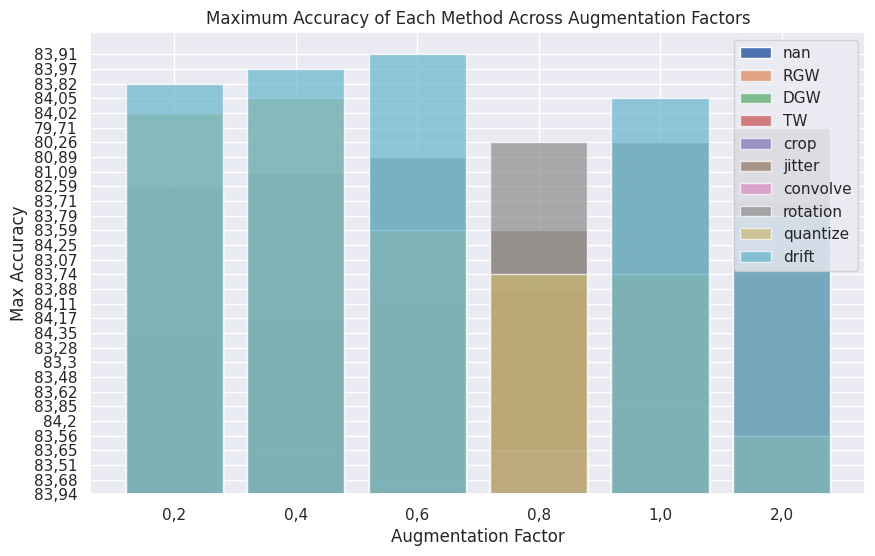

In [80]:
# Get unique method names
methods = df_biovid['Aug_method'].unique()

# Plot the maximum accuracy for each method
plt.figure(figsize=(10, 6))

for method in methods:
    method_data = df_biovid[df_biovid['Aug_method'] == method]
    #plt.plot(method_data['Aug_factor'], method_data['Max_acc_mean'], label=method)
    plt.bar(method_data['Aug_factor'], method_data['Max_acc_mean'], label=method, alpha=0.7)

plt.xlabel('Augmentation Factor')
plt.ylabel('Max Accuracy')
plt.title('Maximum Accuracy of Each Method Across Augmentation Factors')
plt.legend()
plt.show()